Assembling some uv data for Guangwei Fu.  

Stars: 
GJ 3470
WASP 107
WASP 39
HD 209458
HD 189733
WASP 121
WASP 127
HIP 67522

WASP 121 and HIP 67522 are finished Mega-MEATS targets. WASP 127 is a MEATS targets. 

WASP 39 has no COS/STIS UV data. It has WFC3 NUV data from a proposal that Guangwei is CoI on. WASP-107 only has some G140M data - Lya is detected but needs reextraction. Others have archival UV data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from astropy.coordinates import SkyCoord
from datetime import datetime


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [2]:
path = '/media/david/2tb_ext_hd/hddata/meats/gf_spectra/'
stars = os.listdir(path)
stars

['GJ_3470', 'HD189733', 'HD209458', 'WASP-107', 'WASP-39']

GJ_3470
[11]
['/media/david/2tb_ext_hd/hddata/meats/gf_spectra/GJ_3470/hst_14843_cos_gj-3470_g130m-g160m-cg230l_ldcu_cspec.fits']


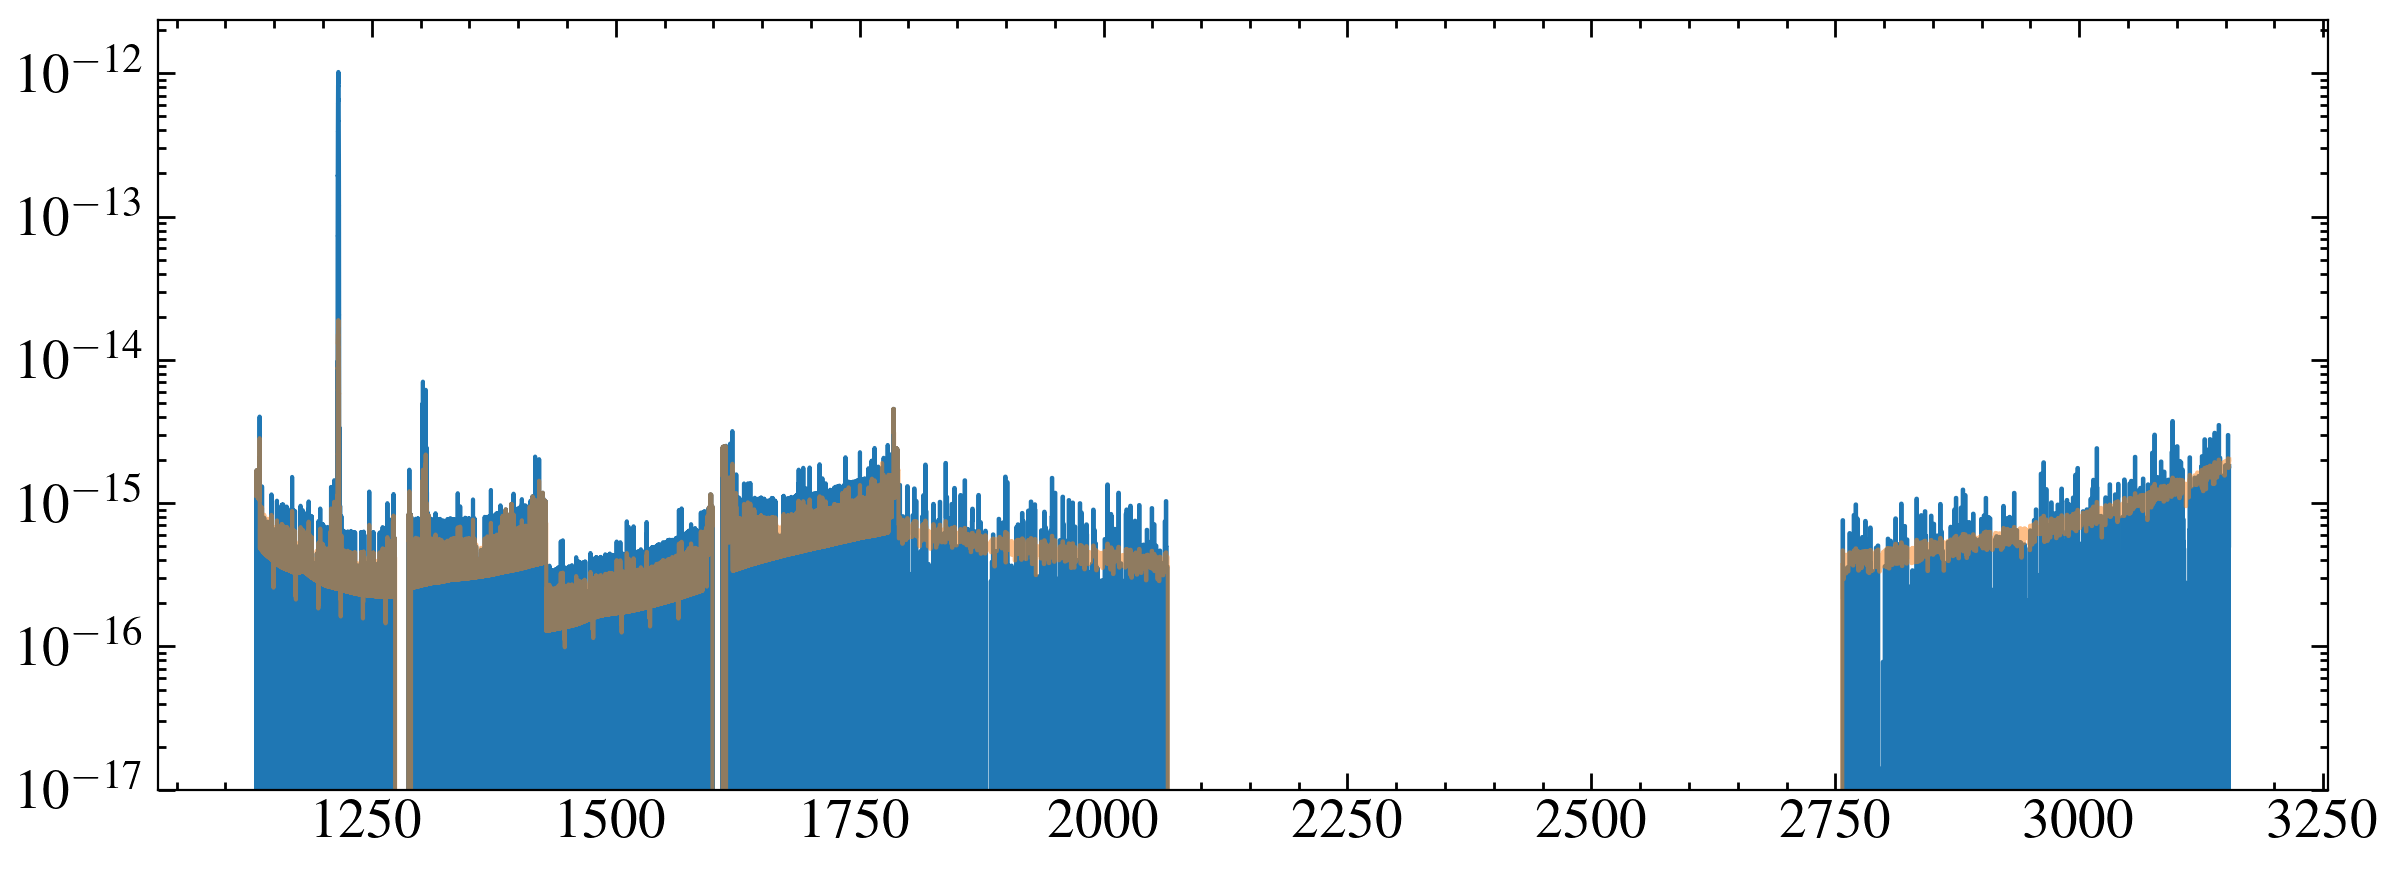

HD189733
[ 2  5  9 13 17 21 27 28 29]
['/media/david/2tb_ext_hd/hddata/meats/gf_spectra/HD189733/hst_11673_cos_hd-189733_g130m_lb5k_cspec.fits', '/media/david/2tb_ext_hd/hddata/meats/gf_spectra/HD189733/hst_11673_stis_hd-189733_g140m_ob5k_cspec.fits', '/media/david/2tb_ext_hd/hddata/meats/gf_spectra/HD189733/hst_12920_stis_hd-189733_g140m_oc1f_cspec.fits', '/media/david/2tb_ext_hd/hddata/meats/gf_spectra/HD189733/hst_14767_cos_hd-189733_g130m_ld9m_cspec.fits', '/media/david/2tb_ext_hd/hddata/meats/gf_spectra/HD189733/hst_15338_stis_hd-189733_e230m_odfv_cspec.fits', '/media/david/2tb_ext_hd/hddata/meats/gf_spectra/HD189733/hst_15710_cos_hd-189733_g130m_ldzk_cspec.fits', '/media/david/2tb_ext_hd/hddata/meats/gf_spectra/HD189733/hst_17157_stis_hd-189733_g140m_oewb_cspec.fits', '/media/david/2tb_ext_hd/hddata/meats/gf_spectra/HD189733/hst_12984_cos_hd-189733_g130m_lc0u_cspec.fits', '/media/david/2tb_ext_hd/hddata/meats/gf_spectra/HD189733/hst_16225_stis_hd189733_e230h_oee5_cspec.fits']


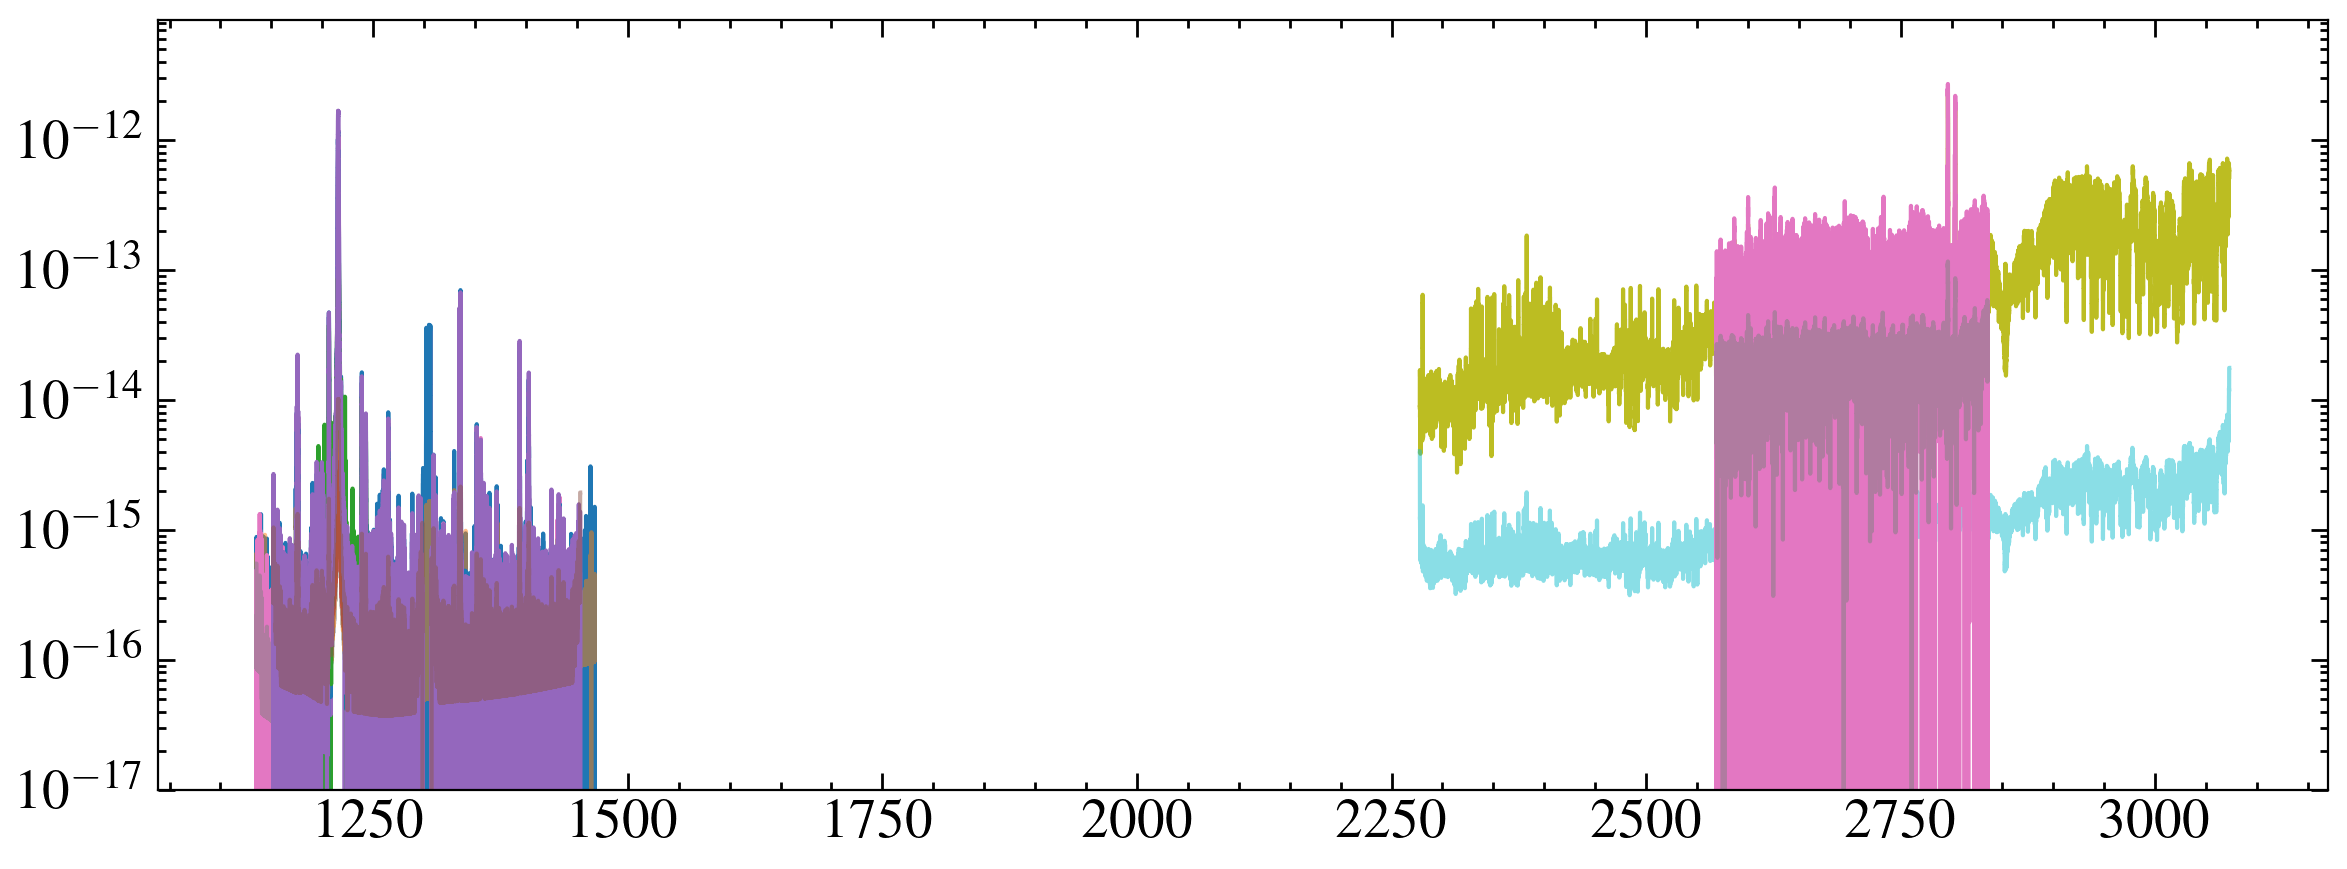

HD209458
[5]
['/media/david/2tb_ext_hd/hddata/meats/gf_spectra/HD209458/hst_11534_cos_hd-209458_g130m-g160m_lb4m_cspec.fits']


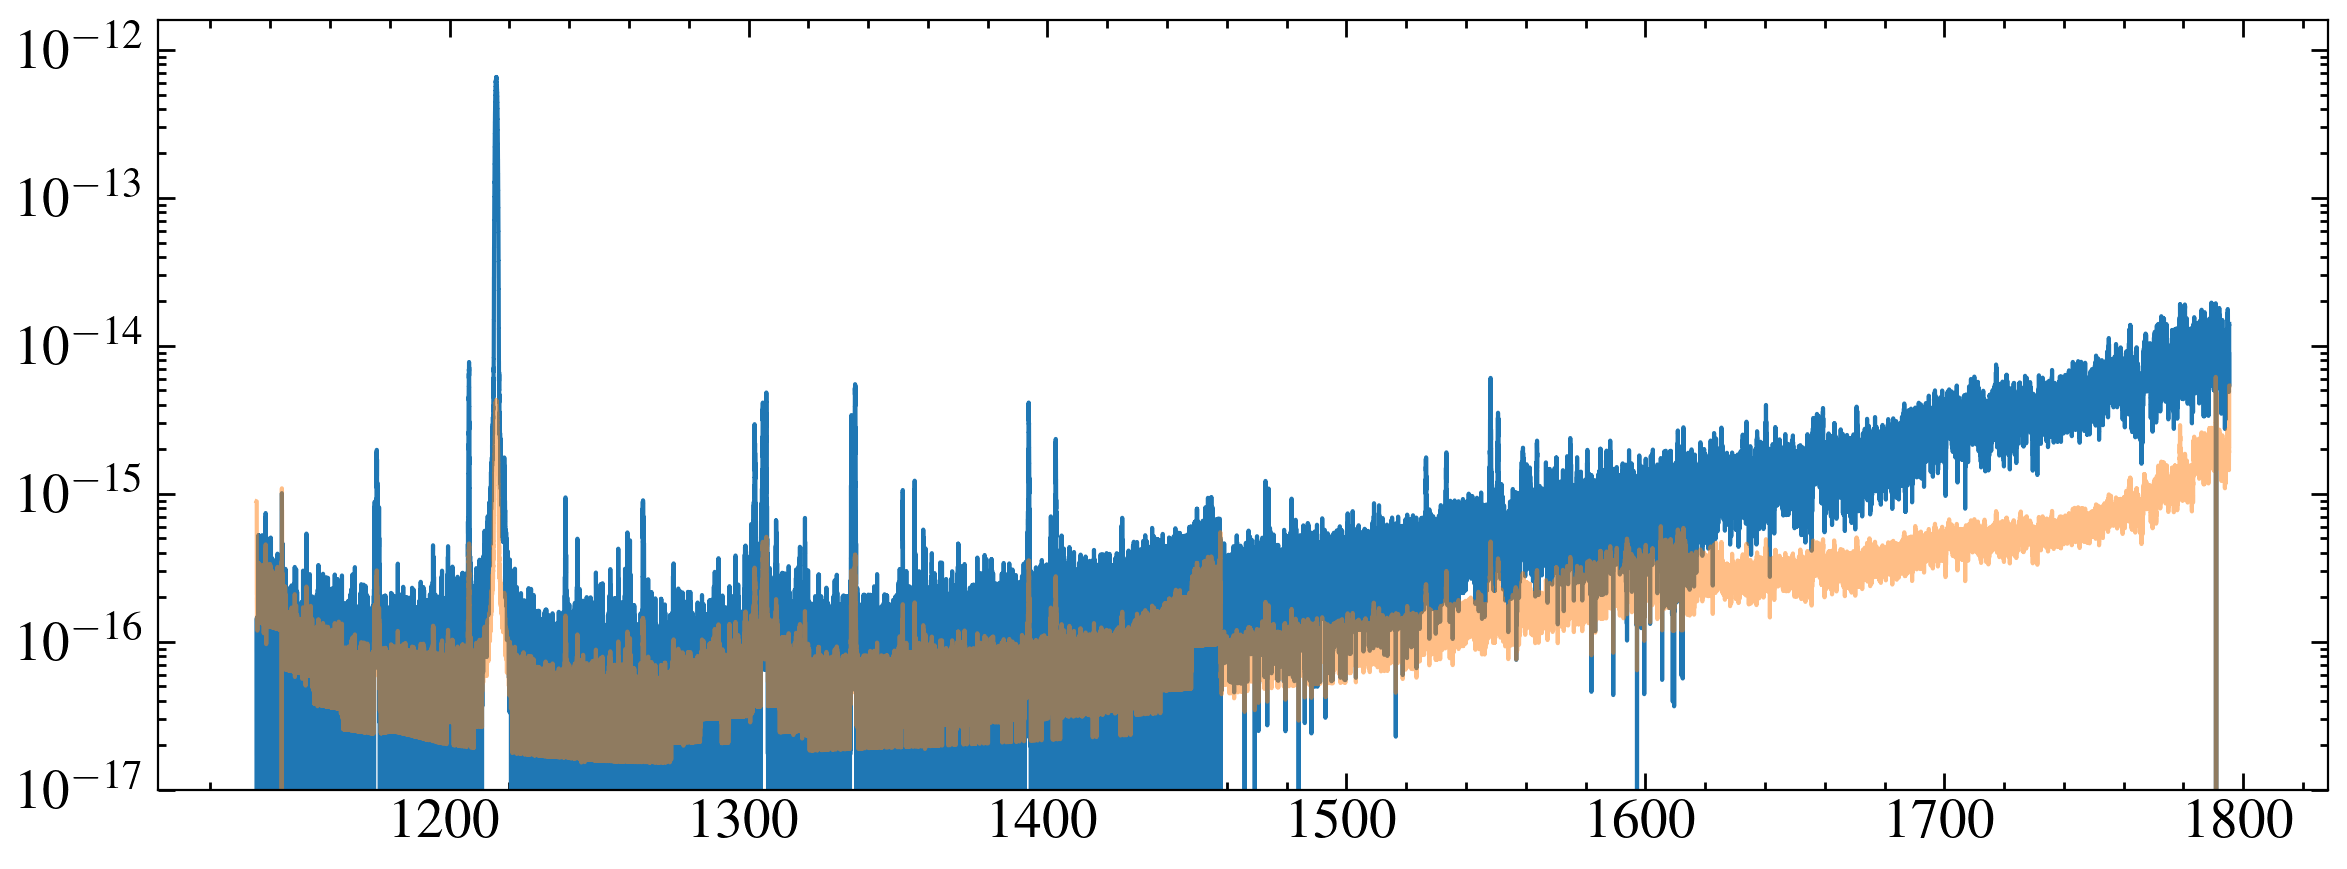

WASP-107
WASP-39


In [21]:
for star in stars:
    print(star)
    hasp = glob.glob('{}{}/*cspec.fits'.format(path, star))
    # print(hasp)
    if len(hasp) > 0:
        hasp_top = []
        levels = []
        for spec in hasp:
            level = fits.getheader(spec, 0)['HLSP_LVL']
            levels.append(level)
            # if level >=3:
                # hasp_top.append(spec)
        # print(levels)
        top_args = np.flatnonzero(levels == np.max(levels))
        # print(top_args)
        for arg in top_args:
            hasp_top.append(hasp[arg])
        print(hasp_top)

        fig, ax = plt.subplots()
        for spec in hasp_top:
            data = fits.getdata(spec, 1)[0]
            ax.step(data['WAVELENGTH'], data['FLUX'], where='mid')
            ax.step(data['WAVELENGTH'], data['ERROR'], where='mid', alpha =0.5)
        ax.set_yscale('log')
        ax.set_ylim(1e-17)
        plt.show()
            



Not great coverage from HASP. What about x1ds? What do we have?

GJ_3470


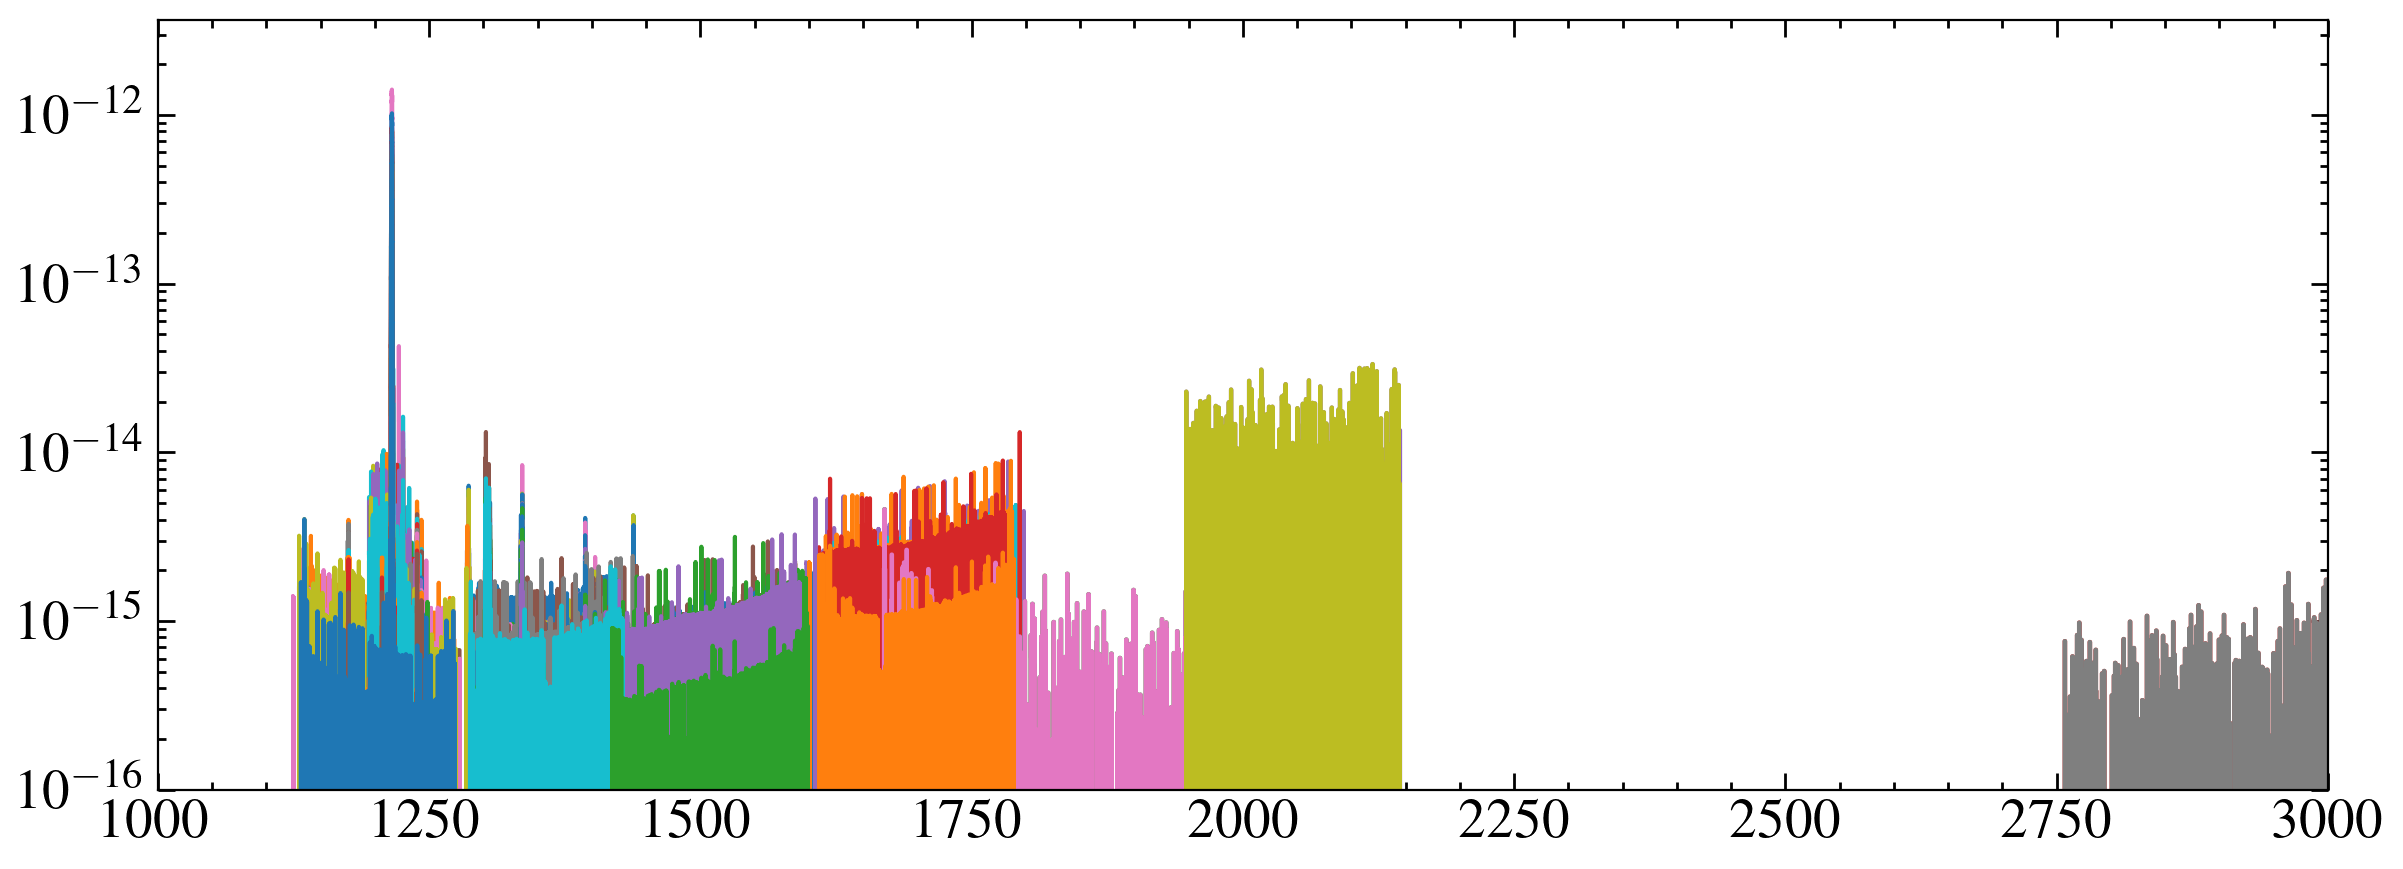

HD189733


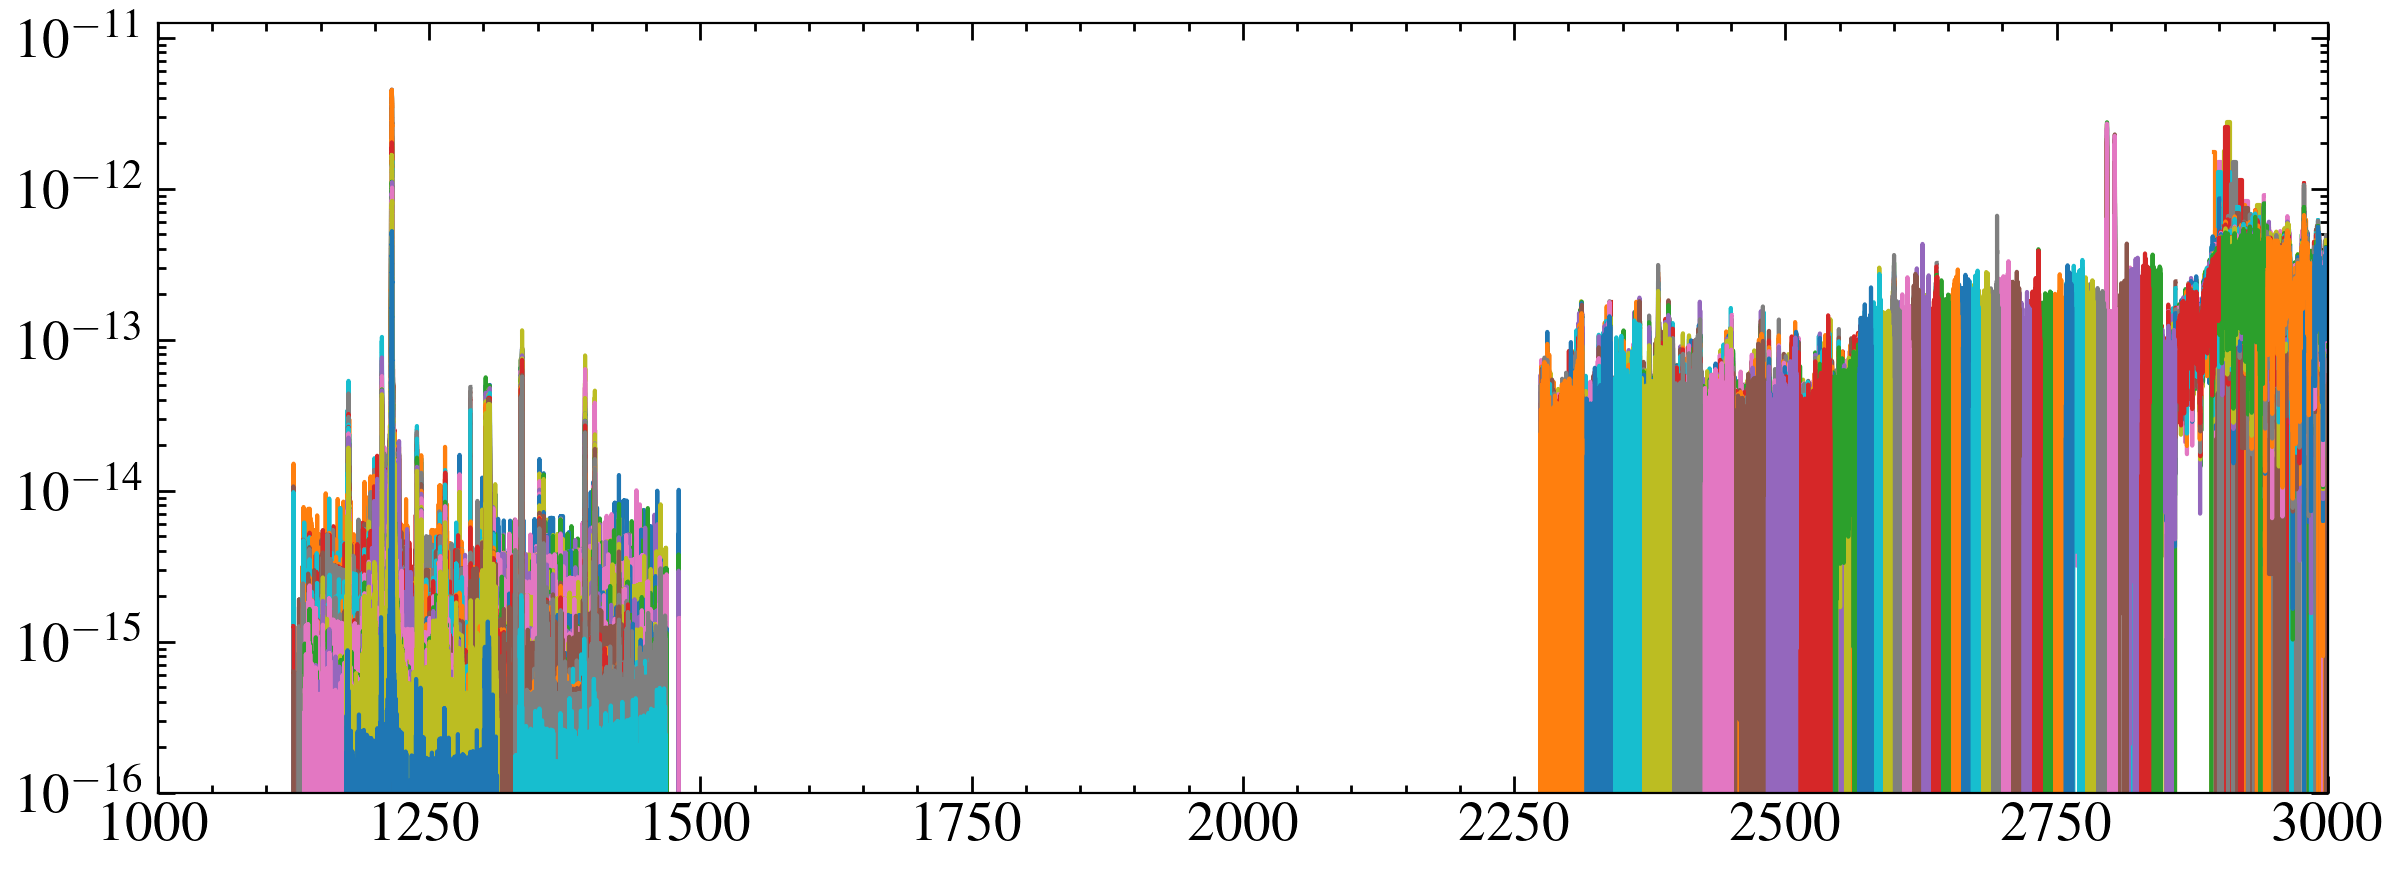

HD209458


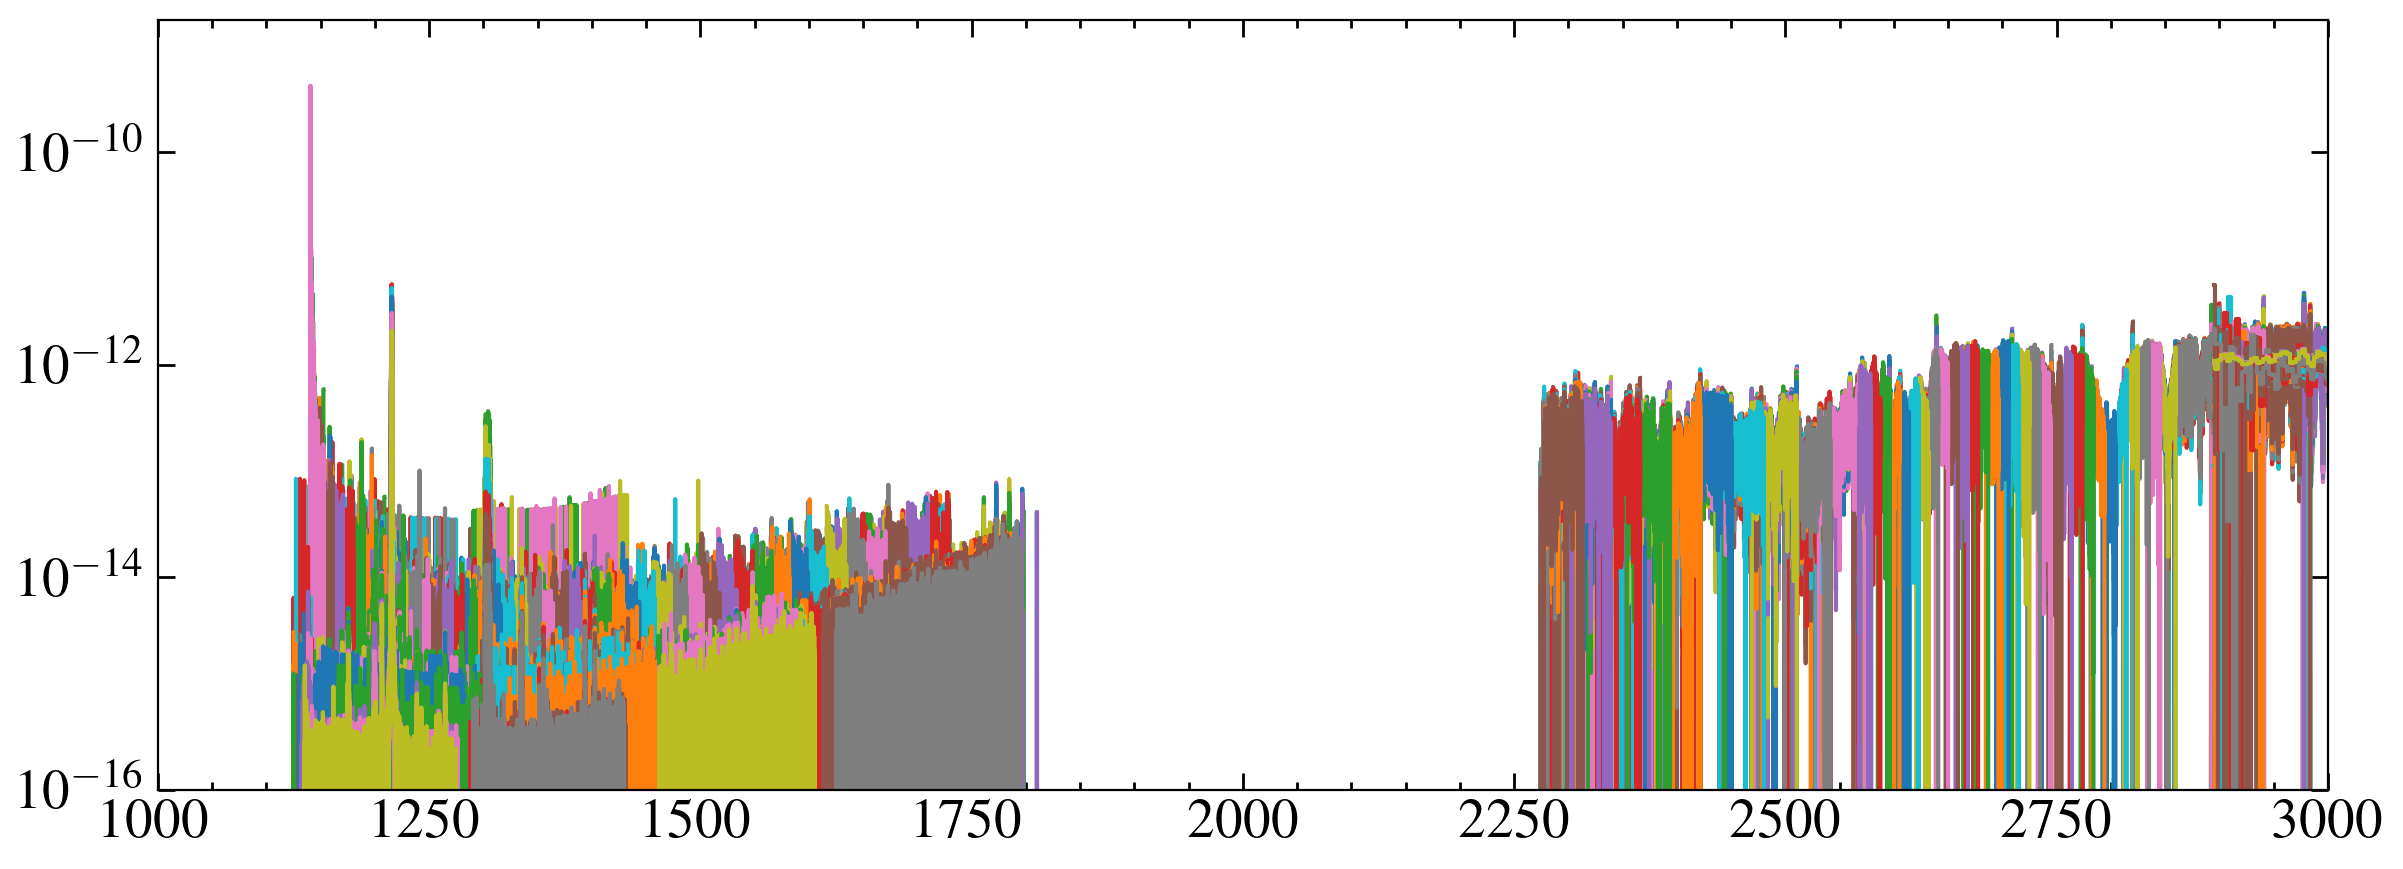

WASP-107


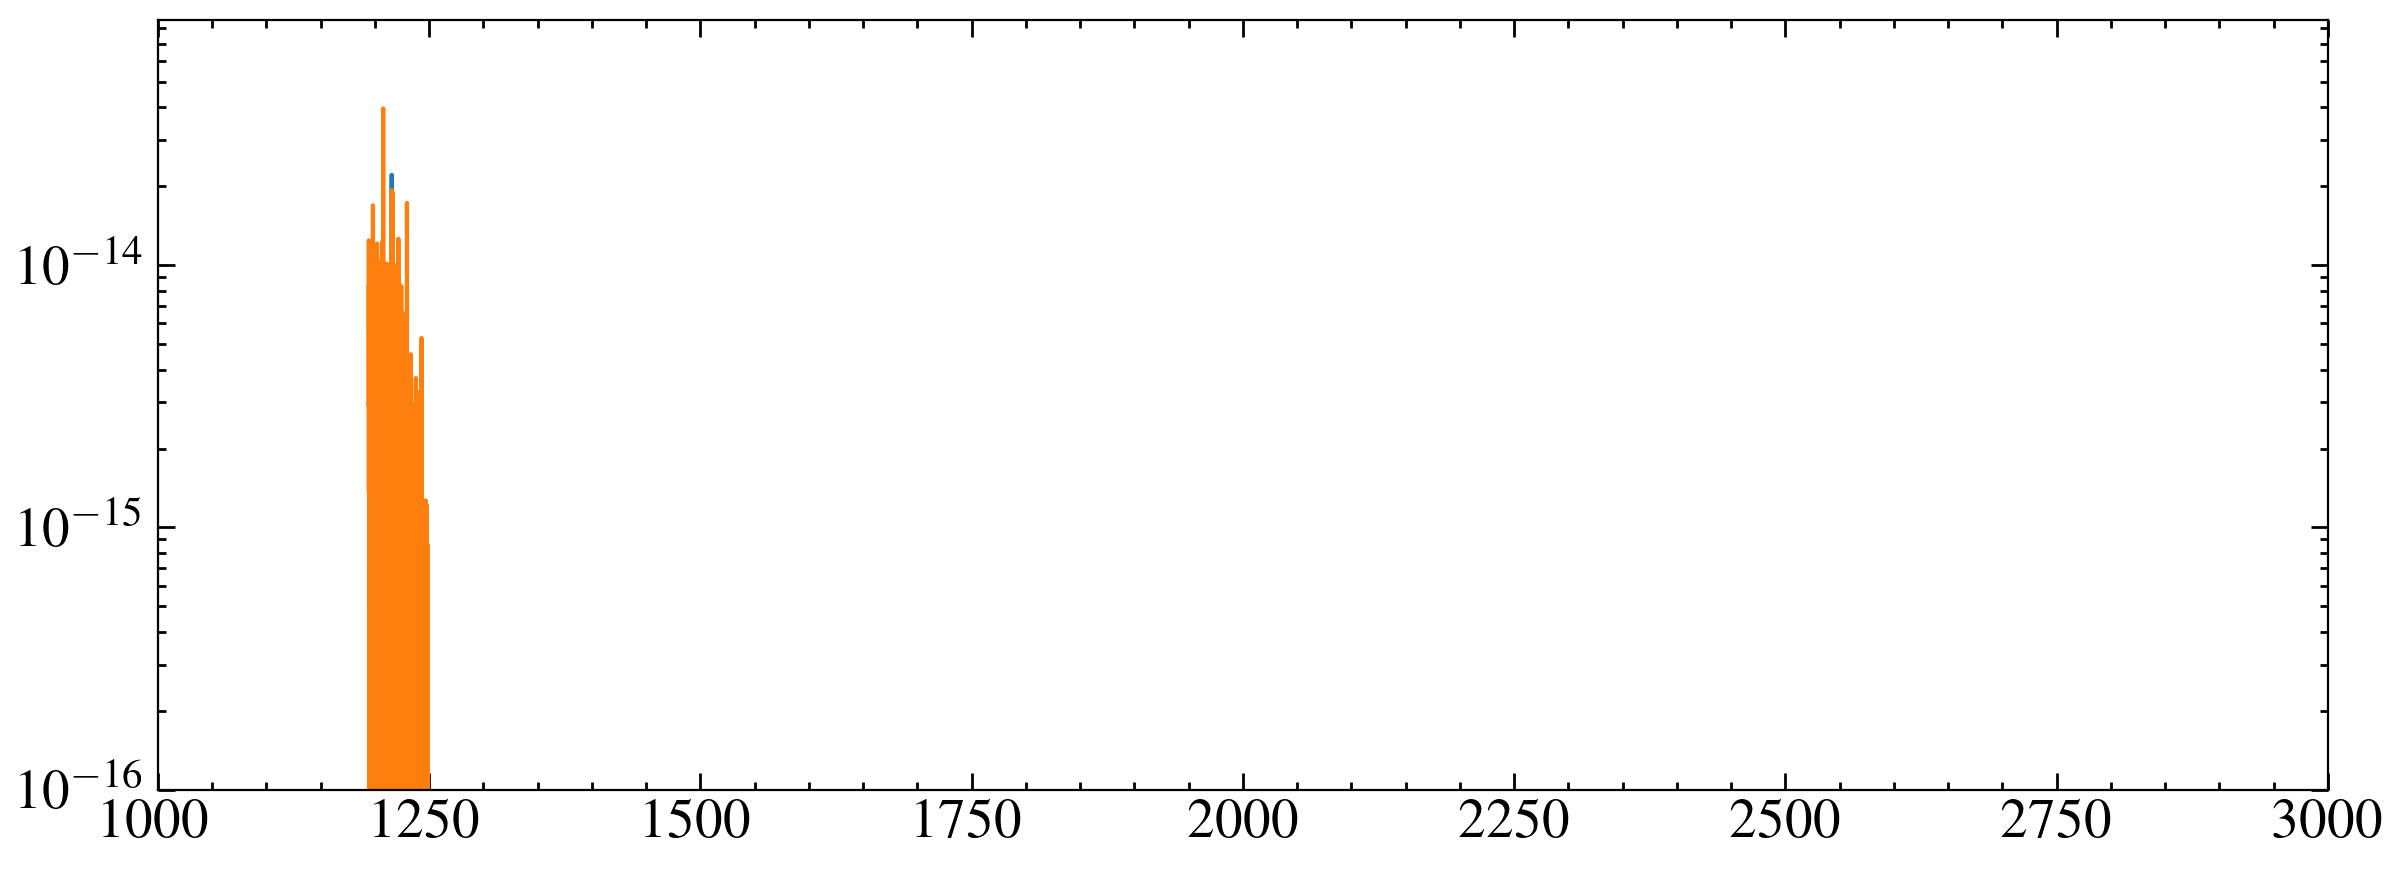

WASP-39


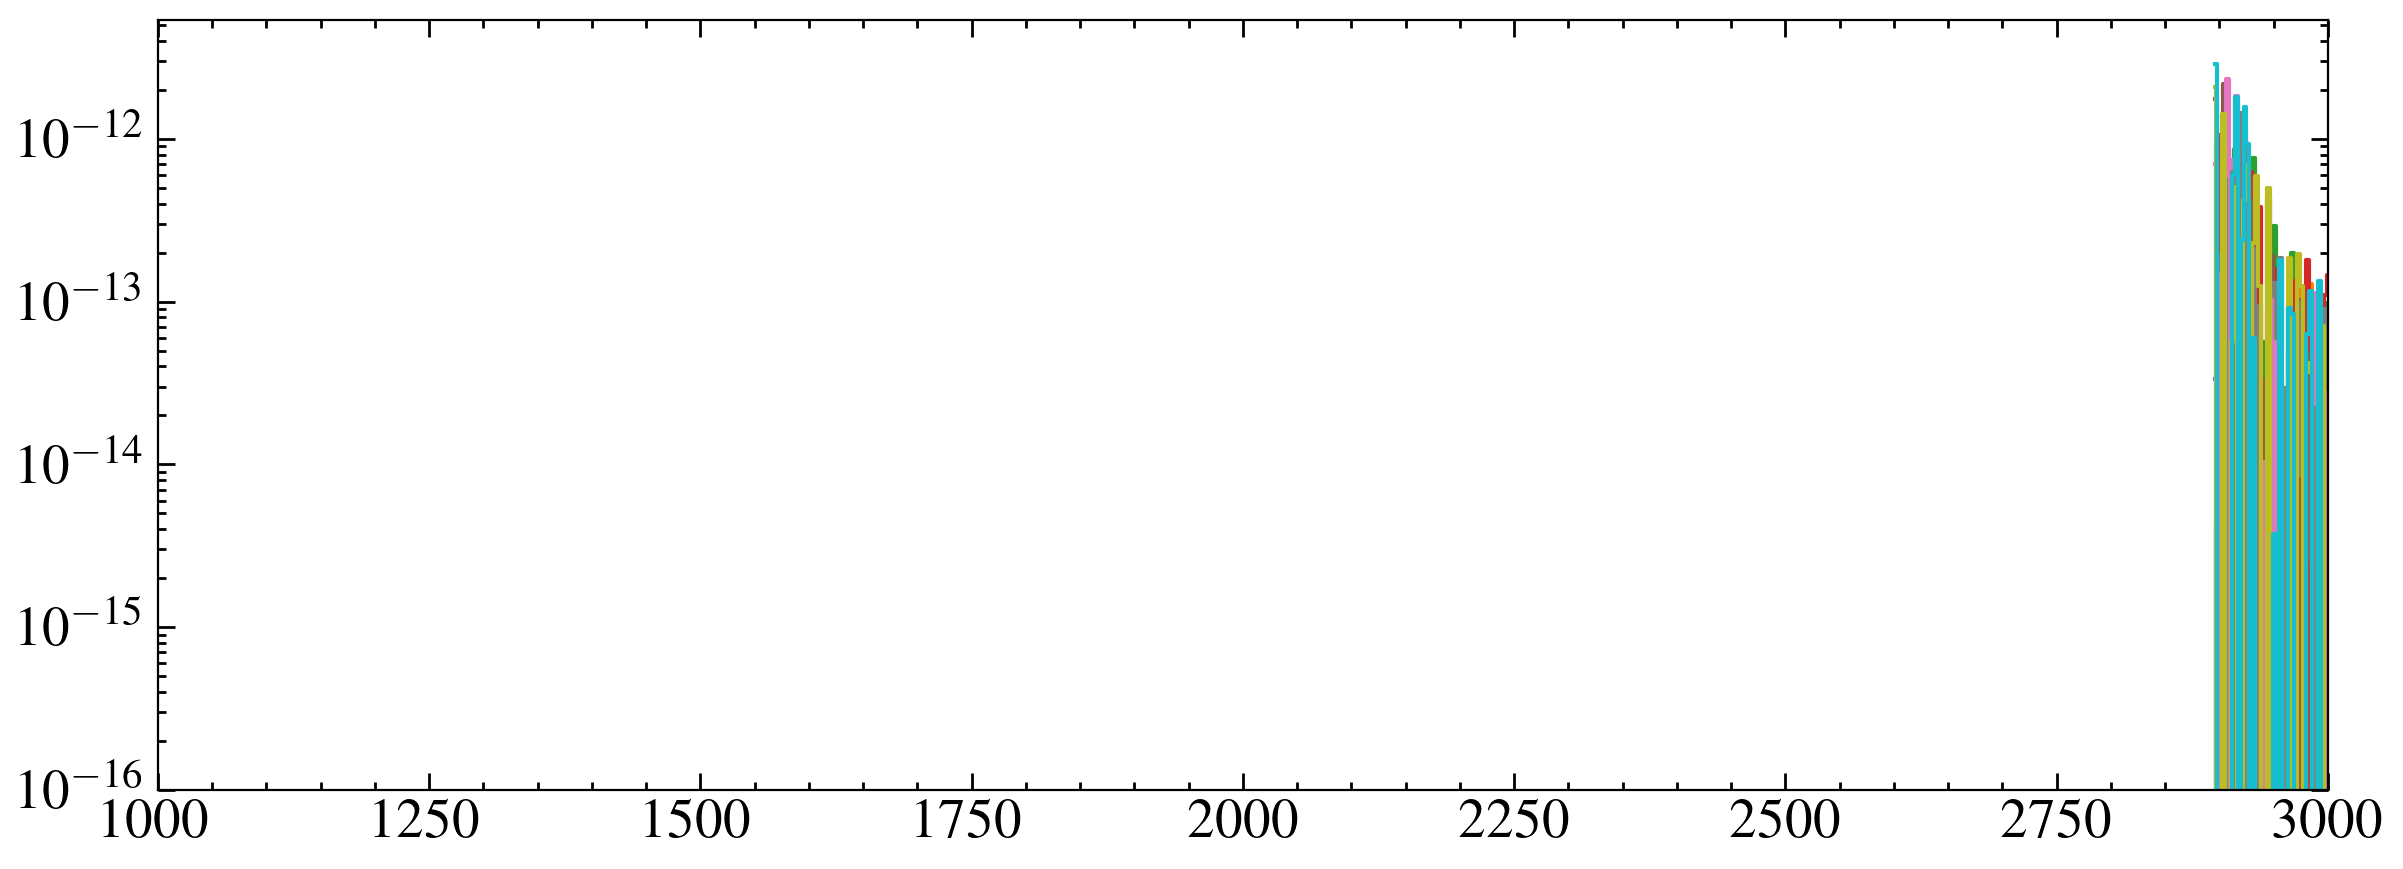

In [29]:
for star in stars:
    print(star)
    x1ds = np.hstack((glob.glob('{}{}/*x1d.fits'.format(path, star)), glob.glob('{}{}/*x1dsum.fits'.format(path, star))))
    # print(x1ds)
    fig, ax = plt.subplots()
    for x in x1ds:
        dt = fits.getdata(x, 1)
        for data in dt:
                ax.step(data['WAVELENGTH'], data['FLUX'], where='mid')
            # ax.step(data['WAVELENGTH'], data['ERROR'], where='mid', alpha =0.5)
    ax.set_yscale('log')
    ax.set_ylim(1e-16)
    ax.set_xlim(1000, 3000)
    plt.show()

GJ_3470
['/media/david/2tb_ext_hd/hddata/meats/gf_spectra/GJ_3470/hst_14843_cos_gj-3470_g130m-g160m-cg230l_ldcu_cspec.fits']


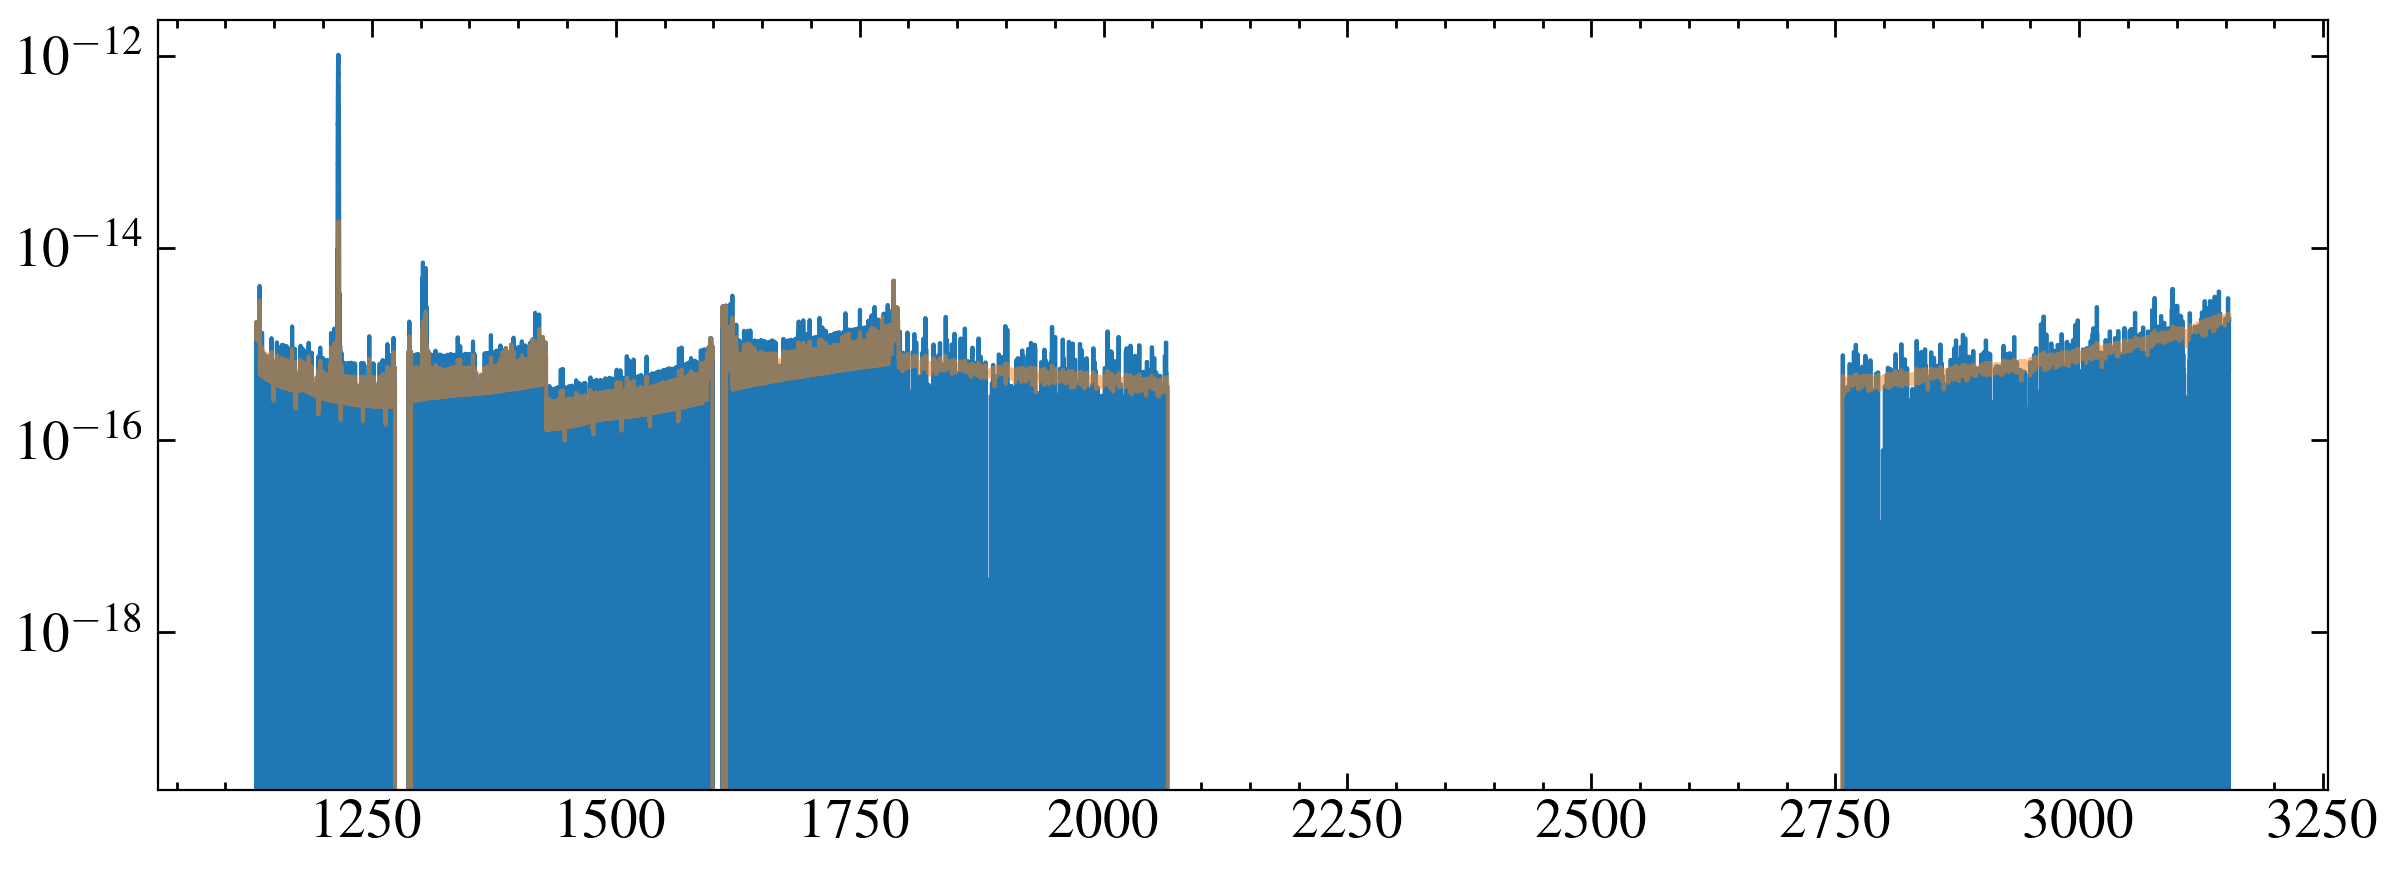

In [41]:
for star in stars[0:1]:
    print(star)
    hasp = glob.glob('{}{}/*cspec.fits'.format(path, star))
    # print(hasp)
    if len(hasp) > 0:
        hasp_top = []
        levels = []
        for spec in hasp:
            level = fits.getheader(spec, 0)['HLSP_LVL']
            levels.append(level)
            # if level >=3:
                # hasp_top.append(spec)
        # print(levels)
        top_args = np.flatnonzero(levels == np.max(levels))
        # print(top_args)
        for arg in top_args:
            hasp_top.append(hasp[arg])
        print(hasp_top)

        fig, ax = plt.subplots()
        for spec in hasp_top:
            data = fits.getdata(spec, 1)[0]
            ax.step(data['WAVELENGTH'], data['FLUX'], where='mid')
            ax.step(data['WAVELENGTH'], data['ERROR'], where='mid', alpha =0.5)
        ax.set_yscale('log')
        # ax.set_ylim(-1e-16, 1e-15)
        # ax.set_xlim(2750, 2850)
        plt.show()
            



GJ_3470


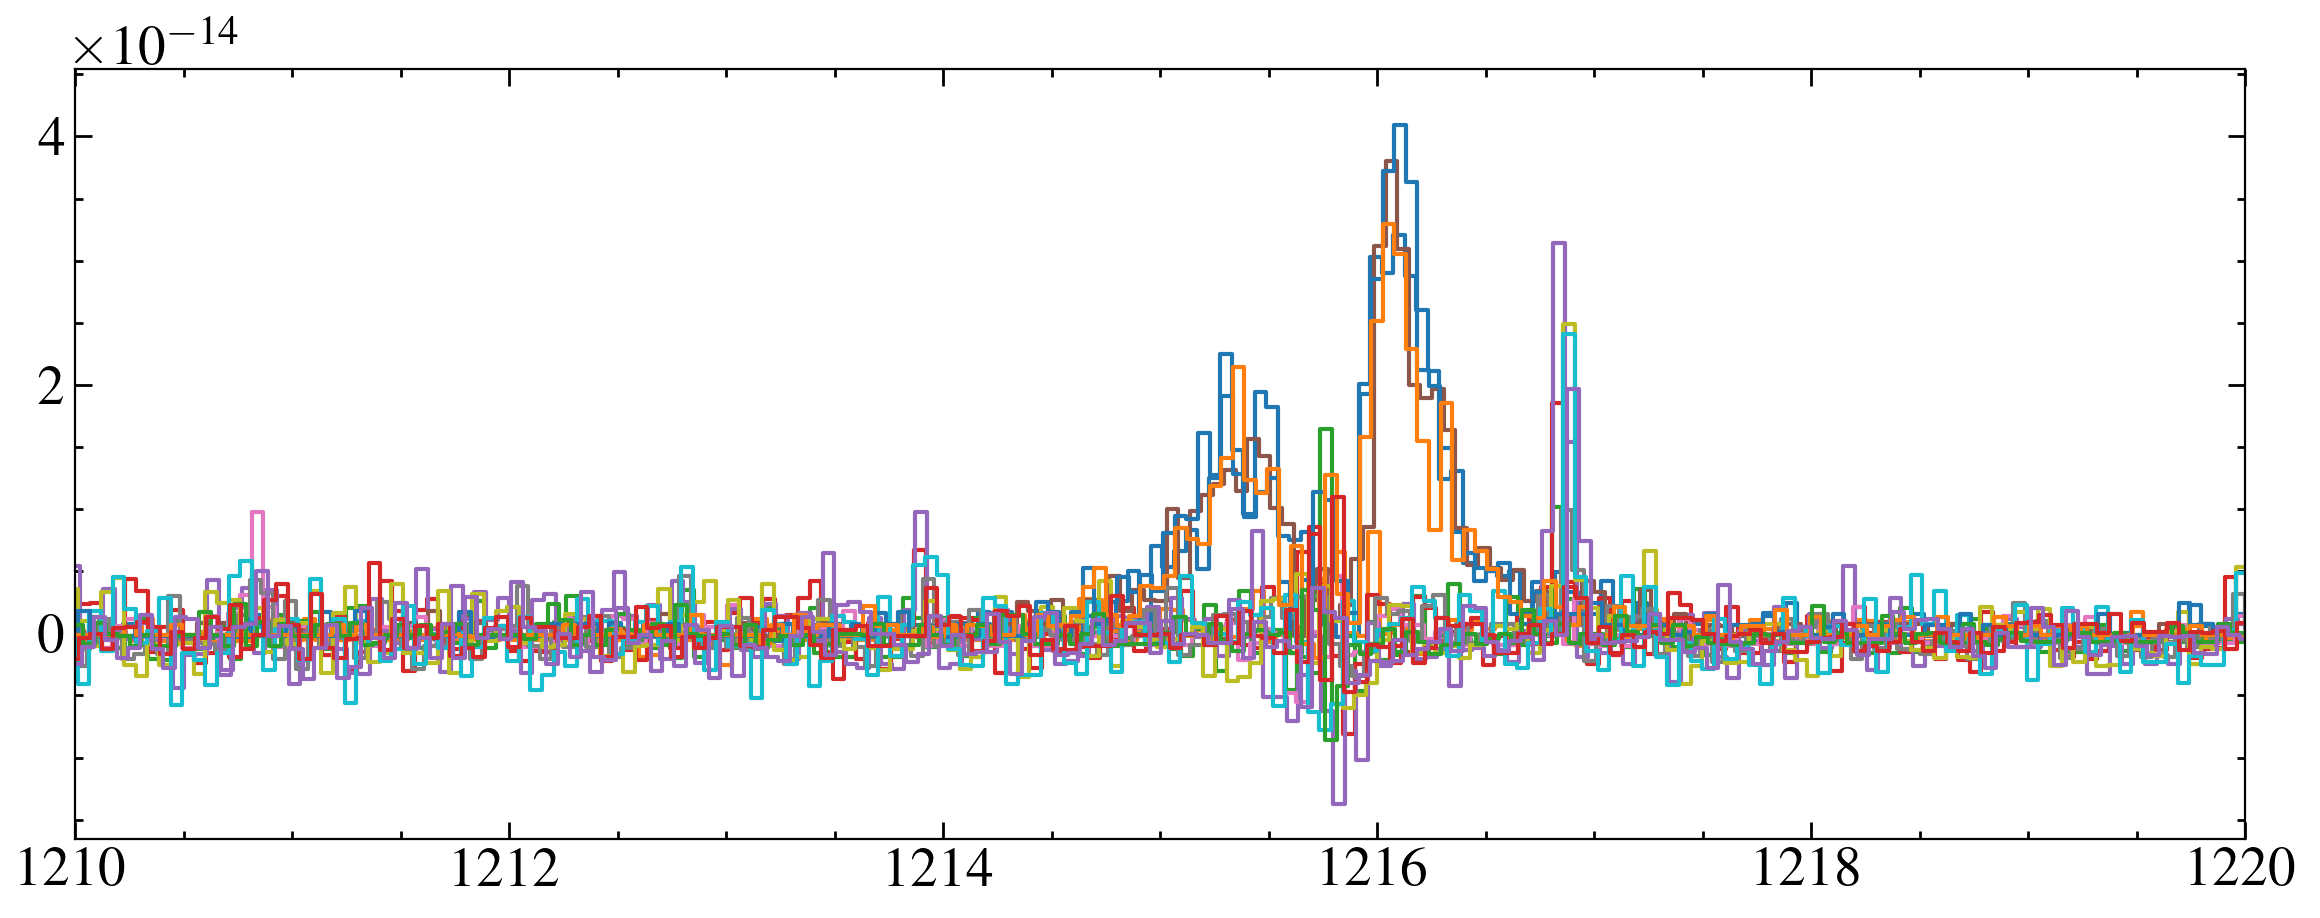

In [45]:
for star in stars[0:1]:
    print(star)
    x1ds = glob.glob('{}{}/*x1d.fits'.format(path, star))
    # print(x1ds)
    fig, ax = plt.subplots()
    for x in x1ds:
        grating = fits.getheader(x, 0)['OPT_ELEM']
        if grating == 'G140M':
            dt = fits.getdata(x, 1)
            for data in dt:
                    ax.step(data['WAVELENGTH'], data['FLUX'], where='mid')
                # ax.step(data['WAVELENGTH'], data['ERROR'], where='mid', alpha =0.5)
    # ax.set_yscale('log')
    # ax.set_ylim(1e-16)
    ax.set_xlim(1210, 1220)
    plt.show()